In [1]:
%matplotlib notebook

# Standard library imports
import logging

# Third party imports#
#import pandas as p#d
import numpy as np
import sympy as sp
#print (sp.__version__)
from sympy.solvers.solveset import nonlinsolve


%load_ext autoreload
%autoreload 2

In [8]:
x, y, alpha, = sp.symbols('x, y, alpha', real=True)
# The potential generalized ()
V = -(1-alpha)/sp.sqrt((x+alpha)**2+y**2) - alpha/sp.sqrt((x-1+alpha)**2+y**2) - 0.5*(x**2+y**2)
# For the system Earth and Moon
Me=5.98e24 
Mm=7.349e22
alpha_value=Mm/(Me+Mm)
V

-alpha/sqrt(y**2 + (alpha + x - 1)**2) - 0.5*x**2 - 0.5*y**2 + (alpha - 1)/sqrt(y**2 + (alpha + x)**2)

In [9]:
# The alpha value is replaced in Potential function
V = V.subs(alpha, alpha_value)
V

-0.5*x**2 - 0.5*y**2 - 0.987859895696532/sqrt(y**2 + (x + 0.0121401043034679)**2) - 0.0121401043034679/sqrt(y**2 + (x - 0.987859895696532)**2)

In [10]:
start, stop, n_values = -1.5, 1.5, 30
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
I, J = np.meshgrid(x_vals, y_vals)
V_f = sp.lambdify([x,y],V,"numpy")
K = V_f(I,J)


<IPython.core.display.Javascript object>


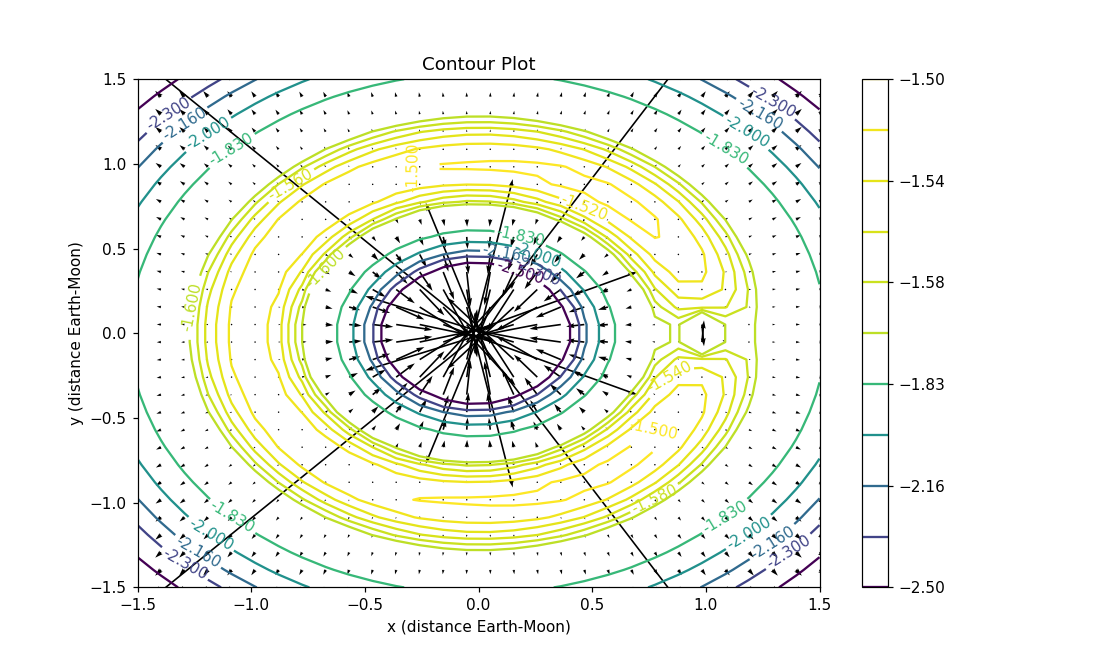

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=(10,6)

fig, ax = plt.subplots()
levels = np.linspace(-2.5, -1, 10)
levels = np.array([-2.5, -2.3, -2.16, -2, -1.83, -1.6, -1.58, -1.56, -1.54, -1.52,-1.5])       
cp = ax.contour(I, J, K, levels)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (distance Earth-Moon)')
ax.set_ylabel('y (distance Earth-Moon)')
plt.show()

In [15]:
Fx = -sp.diff(V,x)
Fx_f = sp.lambdify([x,y], Fx,"numpy")
Fy = -sp.diff(V,y)
Fy_f = sp.lambdify([x,y], Fy,"numpy")

In [16]:
Fx_values = Fx_f(I,J)
Fy_values = Fy_f(I,J)
ax.quiver(I, J, Fx_values, Fy_values)
plt.show()

<IPython.core.display.Javascript object>


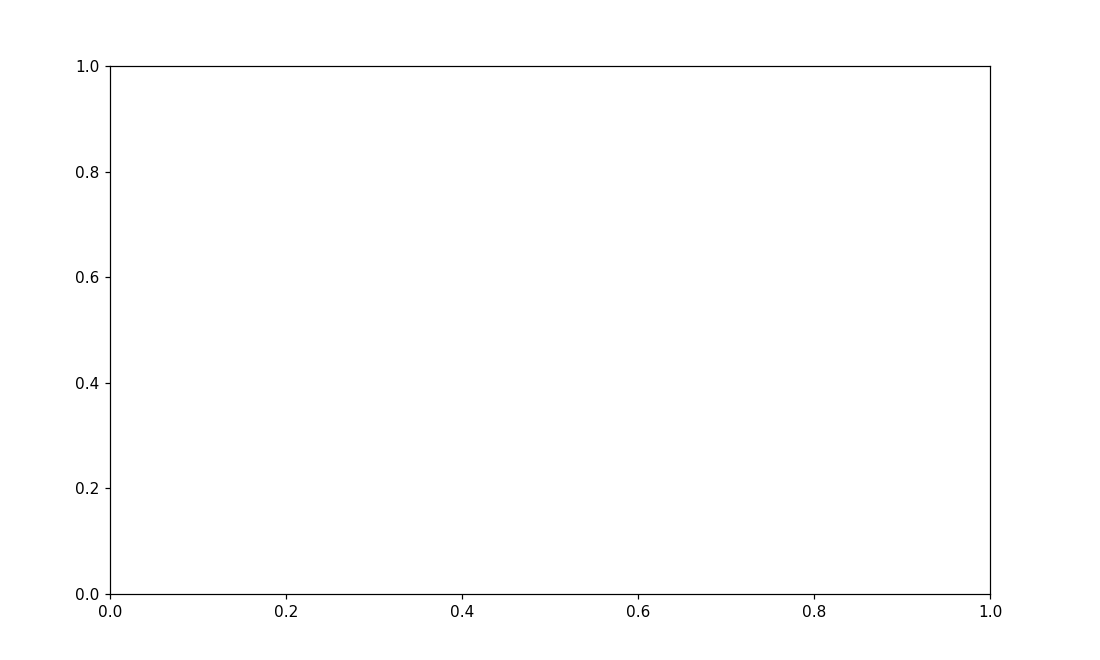

NameError: name 'X' is not defined

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,6))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

levels = np.array([-2.5, -2.3, -2.16, -2, -1.83, -1.6, -1.59, -1.58, -1.57, -1.56, -1.55, -1.54, -1.53, -1.52, -1.51, -1.5, -1.4])       
cp = plt.contourf(X, Y, Z, levels)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()



<IPython.core.display.Javascript object>


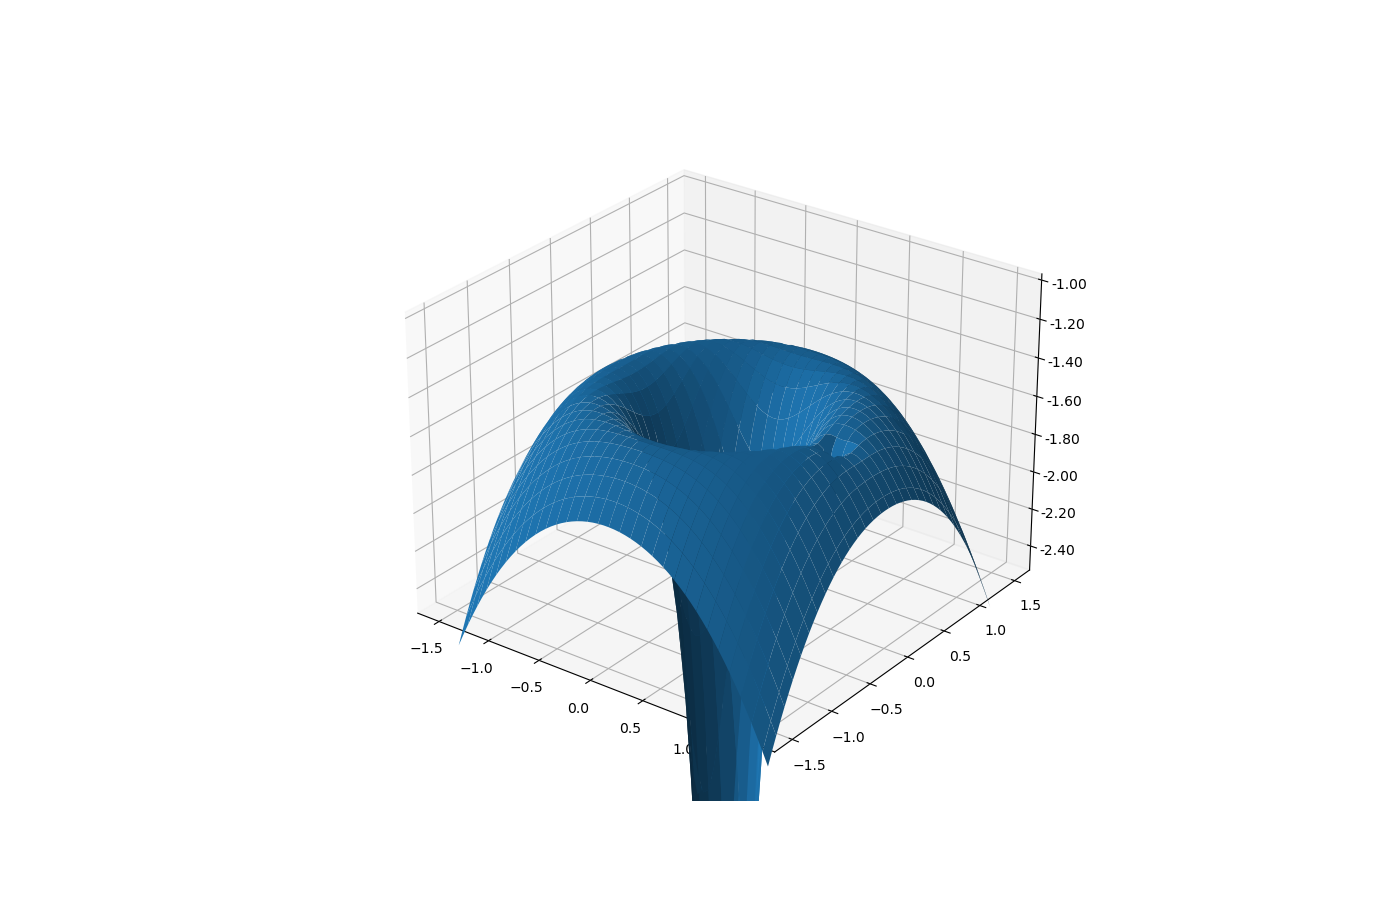

In [198]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
#ax = fig.add_axes([left, bottom, width, height]) 
#ax = plt.axes(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-2.5, -1)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [1]:
import sympy as sp
#print (sp.__version__)
from sympy.solvers.solveset import nonlinsolve

In [2]:
x, y, alpha, = sp.symbols('x, y, alpha', real=True)

In [3]:
V = -(1-alpha)/sp.sqrt((x+alpha)**2+y**2) - alpha/sp.sqrt((x-1+alpha)**2+y**2) - 0.5*(x**2+y**2)
V = V.subs(alpha,0.012)
V

-0.5*x**2 - 0.5*y**2 - 0.988/sqrt(y**2 + (x + 0.012)**2) - 0.012/sqrt(y**2 + (x - 0.988)**2)

In [4]:
V_f = sp.lambdify([x,y],V,"numpy")

In [5]:
Fx = -sp.diff(V,x)
Fx_f = sp.lambdify([x,y], Fx,"numpy")

In [6]:
Fy = -sp.diff(V,y)
Fy_f = sp.lambdify([x,y], Fy,"numpy")

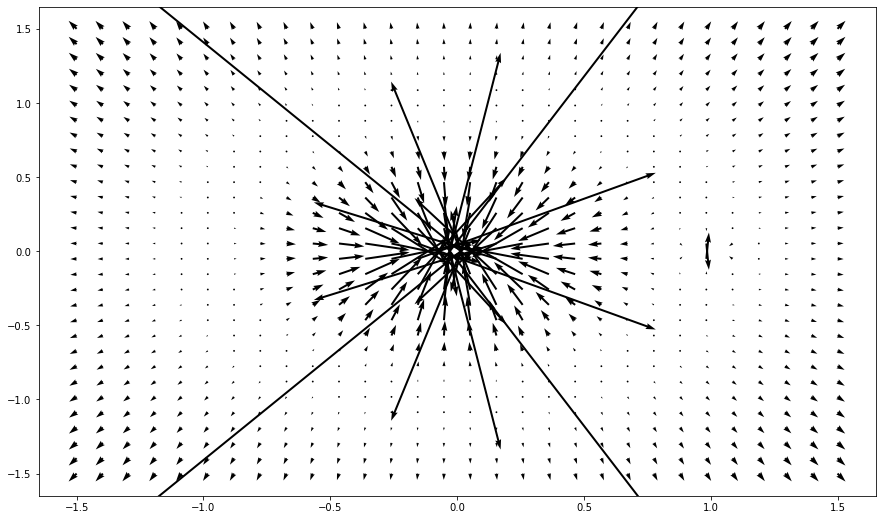

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(15,9)

start, stop, n_values = -1.5, 1.5, 30
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
x, y = np.meshgrid(x_vals, y_vals)
Fx_values = Fx_f(x,y)
Fy_values = Fy_f(x,y)


plt.quiver(x, y, Fx_values, Fy_values)
plt.show()


In [11]:
plt.quiverkey?

In [2]:
#sp.nonlinsolve([Fx, Fy], [x,y])

In [3]:
import sympy as sp

In [4]:
x, y, z= sp.symbols('x, y z', real=True)
w,mu,  mu1, mu2, pi1, pi2, r1, r2, r12 = sp.symbols('w,mu, mu1, mu2, pi1, pi2, r1, r2, r12', real=True, positive=True)
f1, f2, f3, f4, f5, f6 = sp.symbols('f1, f2, f3, f4, f5, f6', cls=sp.Function)

In [5]:
f1 = -(mu1/r1**3)*(x+pi2*r12)-(mu2/r2**3)*(x-pi1*r12)+(w**2)*x
f1

-mu1*(pi2*r12 + x)/r1**3 - mu2*(-pi1*r12 + x)/r2**3 + w**2*x

In [6]:
f2 = -(mu1/r1**3)*y-(mu2/r2**3)*y+(w**2)*y
f2

-mu1*y/r1**3 - mu2*y/r2**3 + w**2*y

In [7]:
f3 = -(mu1/r1**3)*z-(mu2/r2**3)*z
f3

-mu1*z/r1**3 - mu2*z/r2**3

In [28]:
f4 = r1**3 - r2**3
f4

r1**3 - r2**3

In [29]:
f5 = r1**3 - r12**3
f5

r1**3 - r12**3

In [9]:
sol= sp.nonlinsolve([f1, f2, f3], [x,y,z])
sol

{(-r12*(-mu1*pi2*r2**3 + mu2*pi1*r1**3)/(-mu1*r2**3 - mu2*r1**3 + r1**3*r2**3*w**2), 0, 0)}

In [14]:
sol= sol.subs(r12,r1).subs(r2,r1)

In [11]:
alpha=0.012

In [18]:
Fx

-1.0*x - 0.012*(0.988 - x)/(y**2 + (x - 0.988)**2)**(3/2) - 0.988*(-x - 0.012)/(y**2 + (x + 0.012)**2)**(3/2)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

start, stop, n_values = -1.5, 1.5, 60
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
x, y = np.meshgrid(x_vals, y_vals)

u = sp.lambdify([x,y], Fx, "numpy")
v = sp.lambdify([x,y], Fy, "numpy")

plt.quiver(x,y,u,v)
plt.show()

SyntaxError: can't assign to operator (<lambdifygenerated-1>, line 2)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

start, stop, n_values = -1.5, 1.5, 60
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
x, y = np.meshgrid(x_vals, y_vals)




SyntaxError: can't assign to operator (<lambdifygenerated-2>, line 2)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x/np.sqrt(x**2 + y**2)
v = y/np.sqrt(x**2 + y**2)

plt.quiver(x,y,u,v)
plt.show()

-1.0*x - 0.012*(0.988 - x)/(y**2 + (x - 0.988)**2)**(3/2) - 0.988*(-x - 0.012)/(y**2 + (x + 0.012)**2)**(3/2)

In [23]:
Fx.eval([1,2])

AttributeError: 'Add' object has no attribute 'eval'